In [1]:
from Orange.evaluation import compute_CD, graph_ranks
from scipy.stats import friedmanchisquare, rankdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados_ameson.csv')
df.groupby(['dataset', 'algorithm']).agg([np.mean, np.std])

accuracy             f1score          
                        mean       std      mean       std
dataset  algorithm                                        
CIFAR-10 DBEA       0.862032  0.001255  0.863477  0.001146
         NSGAII     0.863666  0.000486  0.865404  0.000874
         PAES       0.674317  0.170031  0.653973  0.219442
         PESA2      0.863950  0.000158  0.865880  0.000601
         SMSEMOA    0.845166  0.011567  0.846571  0.011309
         SPEA2      0.863883  0.000370  0.865927  0.000452
         eMOEA      0.849617  0.011267  0.850896  0.011230
EUROSAT  DBEA       0.944074  0.006949  0.944493  0.006841
         NSGAII     0.954998  0.001276  0.955374  0.001167
         PAES       0.766019  0.187970  0.764893  0.192274
         PESA2      0.952312  0.004828  0.952692  0.004842
         SMSEMOA    0.924845  0.012287  0.925771  0.012338
         SPEA2      0.954566  0.002871  0.955004  0.002857
         eMOEA      0.929660  0.019040  0.929914  0.019009
MNIST    DBEA       0.996365  0.000206  0.996337  0.000194
         NSGAII     0.996482  0.000167  0.996511  0.000230
         PAES       0.990301  0.003134  0.990444  0.003016
         PESA2      0.996549  0.000194  0.996619  0.000260
         SMSEMOA    0.995551  0.000720  0.995558  0.000657
         SPEA2      0.996515  0.000183  0.996503  0.000255
         eMOEA      0.995634  0.000724  0.995709  0.000732

Null hypothesis: The means of the results of two or more algorithms are the same.
Dataset, objective: CIFAR-10 accuracy
	 null hypothesis: rejected
	 p-value: 2.0195680243540936e-10
	 ranking: [1.8  1.85 2.45 4.05 5.15 5.7  7.  ]
	 names: ['PESA2', 'SPEA2', 'NSGAII', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


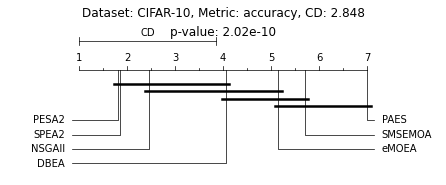

Dataset, objective: CIFAR-10 f1score
	 null hypothesis: rejected
	 p-value: 5.268791557199541e-10
	 ranking: [2.   1.85 2.45 3.85 5.25 5.6  7.  ]
	 names: ['PESA2', 'SPEA2', 'NSGAII', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


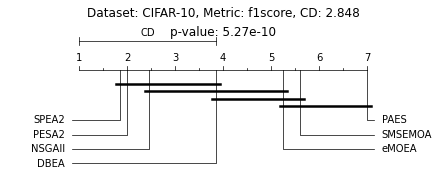

Dataset, objective: MNIST accuracy
	 null hypothesis: rejected
	 p-value: 3.647208888627106e-06
	 ranking: [2.4  2.6  2.8  3.4  4.75 5.55 6.5 ]
	 names: ['PESA2', 'SPEA2', 'NSGAII', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


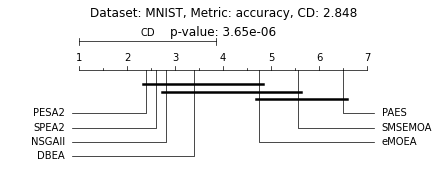

Dataset, objective: MNIST f1score
	 null hypothesis: rejected
	 p-value: 1.9723447870641434e-06
	 ranking: [2.2 2.7 2.7 3.5 4.6 5.8 6.5]
	 names: ['PESA2', 'SPEA2', 'NSGAII', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


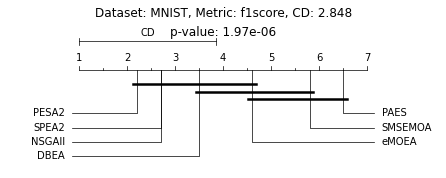

Dataset, objective: EUROSAT accuracy
	 null hypothesis: rejected
	 p-value: 4.645654159126688e-09
	 ranking: [1.65 2.   2.8  4.1  4.95 5.65 6.85]
	 names: ['NSGAII', 'SPEA2', 'PESA2', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


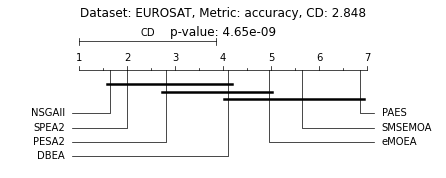

Dataset, objective: EUROSAT f1score
	 null hypothesis: rejected
	 p-value: 4.269073762583879e-09
	 ranking: [1.65 2.   2.8  4.1  4.95 5.6  6.9 ]
	 names: ['NSGAII', 'SPEA2', 'PESA2', 'DBEA', 'eMOEA', 'SMSEMOA', 'PAES']
	 cd: 2.8483477258883494


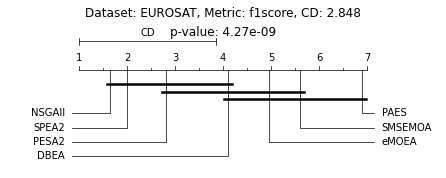

In [23]:
objectives = ['accuracy', 'f1score']
alpha = 0.05
 
print('Null hypothesis:', 'The means of the results of two or more algorithms are the same.')

for dataset in df.dataset.unique():
  
    data = df[df.dataset == dataset]
    algorithms = data.algorithm.unique()
    
    for objective in objectives:
    
        print('Dataset, objective:', dataset, objective)

        df1 = pd.DataFrame({algorithm: list(data[data.algorithm == algorithm][objective]) for algorithm in algorithms})
        values = df1.values
        names = df1.columns   
        
        friedman = friedmanchisquare(*values.T)
        ranks = np.array([rankdata(-p) for p in values])
        average_ranks = np.mean(ranks, axis = 0)

        cd = compute_CD(average_ranks, n=len(df1), alpha=str(alpha), test='nemenyi')

        print('\t', 'null hypothesis:', 'rejected' if friedman.pvalue < alpha else 'accepted')
        print('\t', 'p-value:', friedman.pvalue)
        print('\t', 'ranking:', average_ranks)
        print('\t', 'names:', list(names))
        print('\t', 'cd:', cd)

        graph_ranks(average_ranks, names=names, cd=cd)
        
        title = f'Dataset: {dataset}, Metric: {objective}, CD: {round(cd, 3)}'
        plt.title(title)
        plt.suptitle('p-value: {:.2e}'.format(friedman.pvalue))
        plt.savefig(f'./content/cd_{dataset}_{objective}.pdf', bbox_inches='tight')
        plt.show()
